### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Globals

In [5]:
data_filepath = '../../original_data/'
density_report_filepath = data_filepath + 'DensityReports.xlsx'
historical_incidents_filepath = data_filepath + 'HistoricalIncidents.xlsx'
product_attributes_filepath = data_filepath + 'ProductAttributes.xlsx'
supplier_scorecard_filepath = data_filepath + 'SupplierScorecard.xlsx'

### Load Data

In [6]:
product_attributes = pd.read_excel(product_attributes_filepath)

## Initial Inspection

In [7]:
product_attributes.head()


,ProductReference,ProductName,GarmentType,Material,Size,Collection,Weight
0,PRD00001,Jacket Cotton L,Jacket,Cotton,L,Summer,0.84
1,PRD00002,Shorts Cotton S,Shorts,Cotton,S,Summer,0.35
2,PRD00003,Sweater Cotton M,Sweater,Cotton,M,Spring,0.85
3,PRD00004,Skirt Polyester L,Skirt,Polyester,L,Winter,0.25
4,PRD00005,Shirt Polyester M,Shirt,Polyester,M,Spring,0.16


In [8]:
product_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductReference  10000 non-null  object 
 1   ProductName       10000 non-null  object 
 2   GarmentType       10000 non-null  object 
 3   Material          10000 non-null  object 
 4   Size              10000 non-null  object 
 5   Collection        10000 non-null  object 
 6   Weight            10000 non-null  float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [9]:
product_attributes.describe(include='all')

,ProductReference,ProductName,GarmentType,Material,Size,Collection,Weight
count,10000,10000,10000,10000,10000,10000,10000.000000
unique,10000,357,12,6,5,4,NaN
top,PRD00001,Shirt Cotton M,Shirt,Cotton,M,Summer,NaN
freq,1,272,2043,3926,3508,3113,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.461065
std,NaN,NaN,NaN,NaN,NaN,NaN,0.350351
min,NaN,NaN,NaN,NaN,NaN,NaN,0.080000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.330000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.620000


In [10]:
product_attributes.dtypes

ProductReference     object
ProductName          object
GarmentType          object
Material             object
Size                 object
Collection           object
Weight              float64
dtype: object

In [11]:
product_attributes.isnull().sum()

ProductReference    0
ProductName         0
GarmentType         0
Material            0
Size                0
Collection          0
Weight              0
dtype: int64

In [12]:
product_attributes.duplicated().sum()


0

## Univariate Analysis

In [13]:
product_attributes['GarmentType'].value_counts()

GarmentType
Shirt      2043
Pants      1512
Jacket     1027
T-Shirt     969
Skirt       816
Dress       811
Suit        598
Shorts      522
Coat        497
Sweater     472
Blouse      469
Hoodie      264
Name: count, dtype: int64

<Axes: ylabel='Material'>

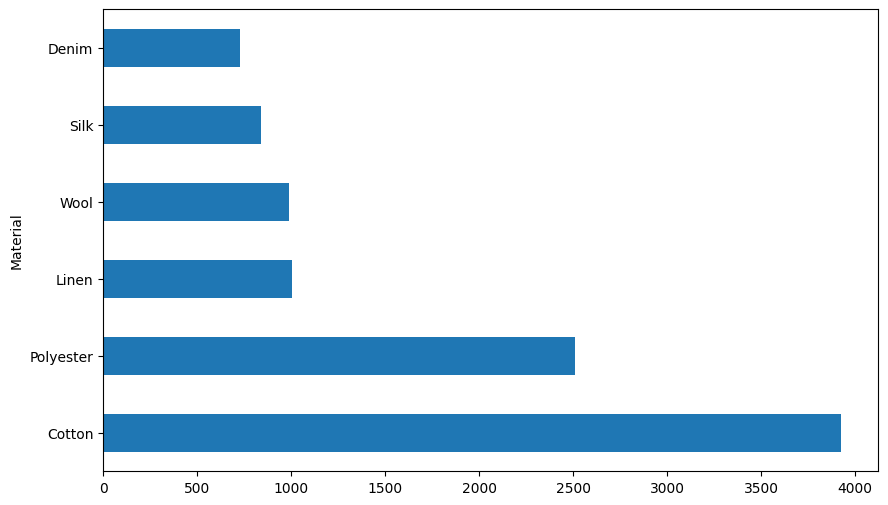

In [17]:
product_attributes['Material'].value_counts().plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='Size'>

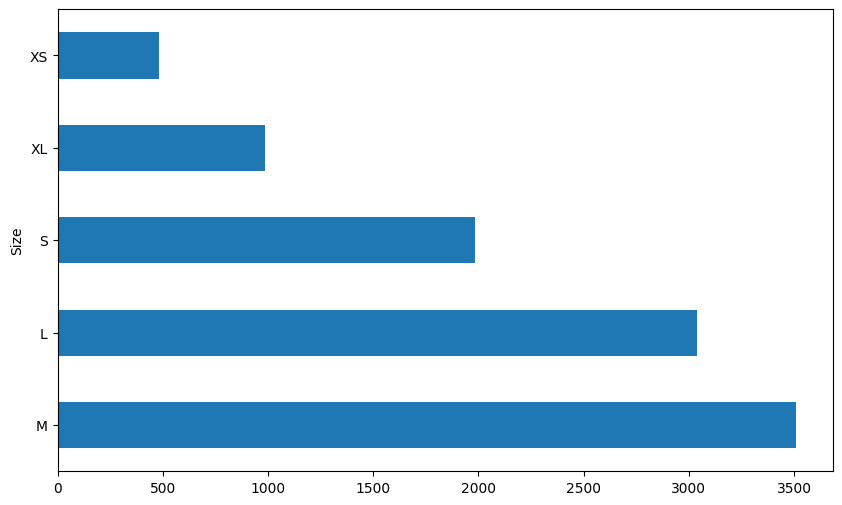

In [22]:
product_attributes['Size'].value_counts().plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='Collection'>

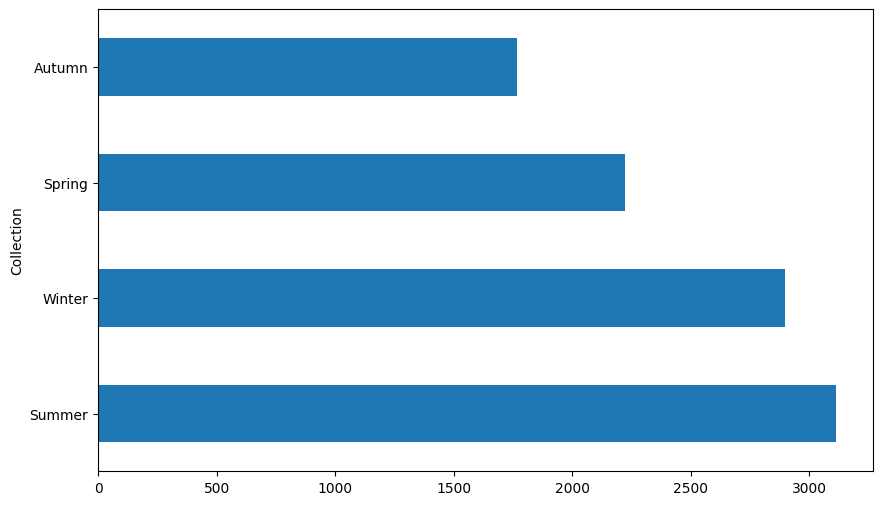

In [23]:
product_attributes['Collection'].value_counts().plot(kind='barh', figsize=(10, 6))

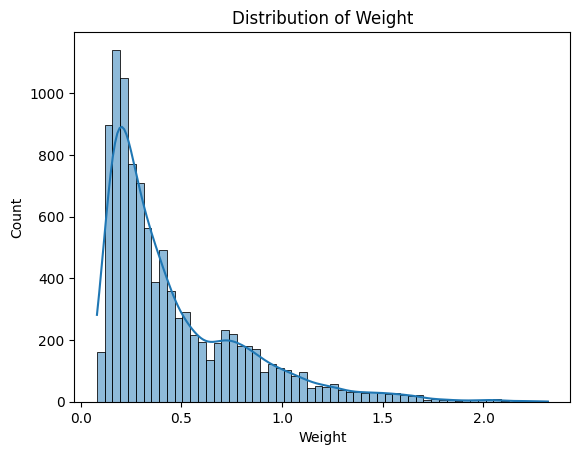

In [26]:
sns.histplot(product_attributes['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.show()

## Bivariate Analysis

In [ ]:
product_attributes_sorted_weight = product_attributes.sort_values(by='Weight', ascending=False)

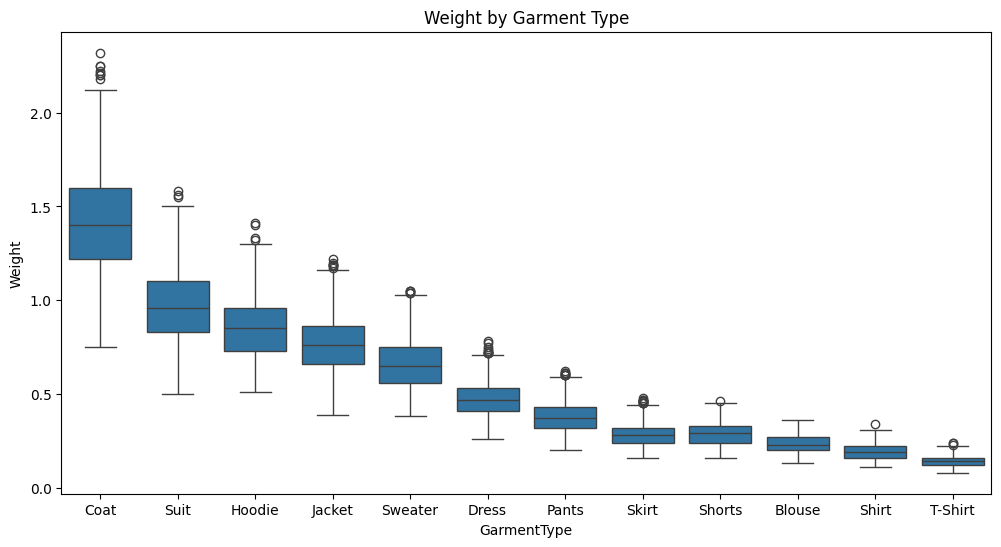

In [ ]:
sns.boxplot(x='GarmentType', y='Weight', data=product_attributes_sorted_weight)
plt.title('Weight by Garment Type')
plt.gcf().set_size_inches(12, 6)
plt.show()

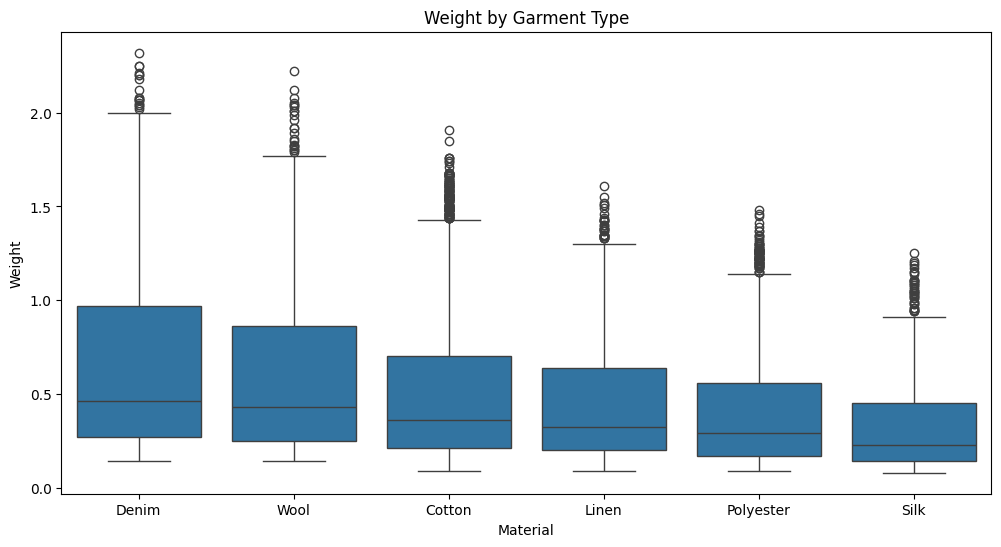

In [31]:
sns.boxplot(x='Material', y='Weight', data=product_attributes_sorted_weight)
plt.title('Weight by Garment Type')
plt.gcf().set_size_inches(12, 6)
plt.show()

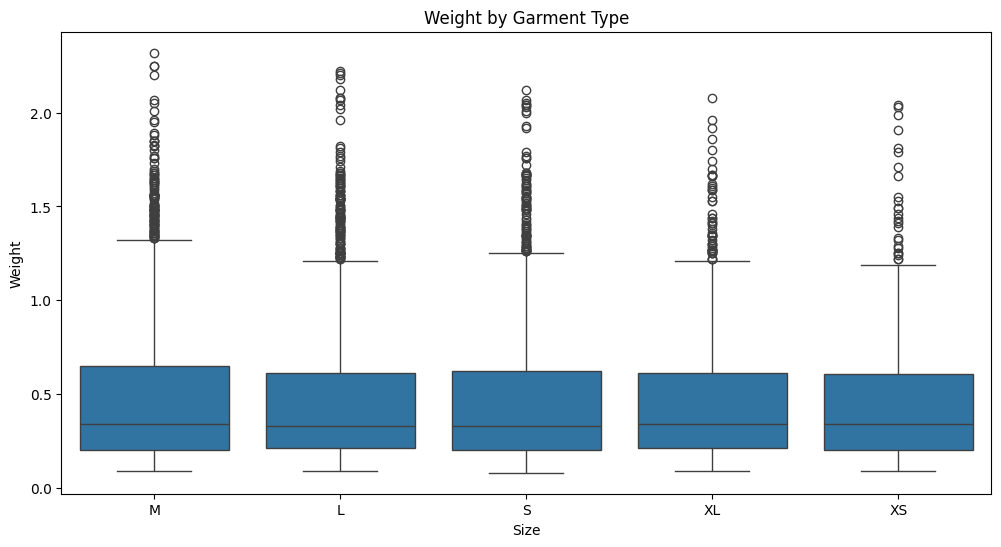

In [32]:
sns.boxplot(x='Size', y='Weight', data=product_attributes_sorted_weight)
plt.title('Weight by Garment Type')
plt.gcf().set_size_inches(12, 6)
plt.show()

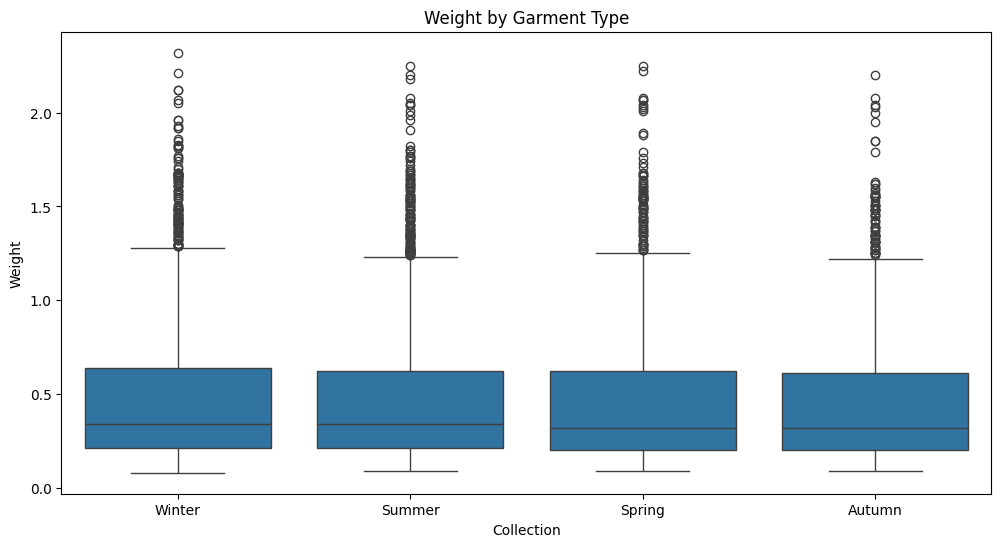

In [33]:
sns.boxplot(x='Collection', y='Weight', data=product_attributes_sorted_weight)
plt.title('Weight by Garment Type')
plt.gcf().set_size_inches(12, 6)
plt.show()

<Axes: xlabel='GarmentType'>

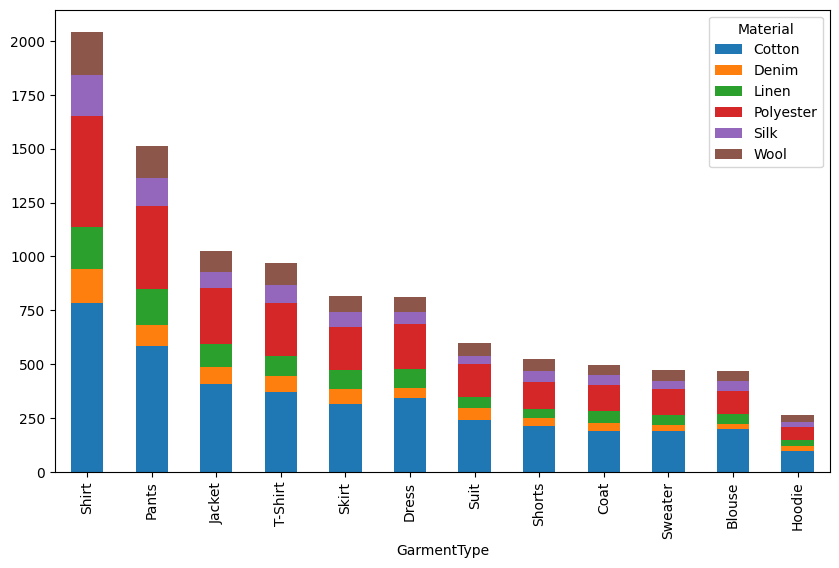

In [40]:
crosstab_sorted = pd.crosstab(product_attributes['GarmentType'], product_attributes['Material'])
crosstab_sorted['Total'] = crosstab_sorted.sum(axis=1)
crosstab_sorted = crosstab_sorted.sort_values(by='Total', ascending=False)
crosstab_sorted.drop(columns='Total', inplace=True)
crosstab_sorted
crosstab_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='GarmentType'>

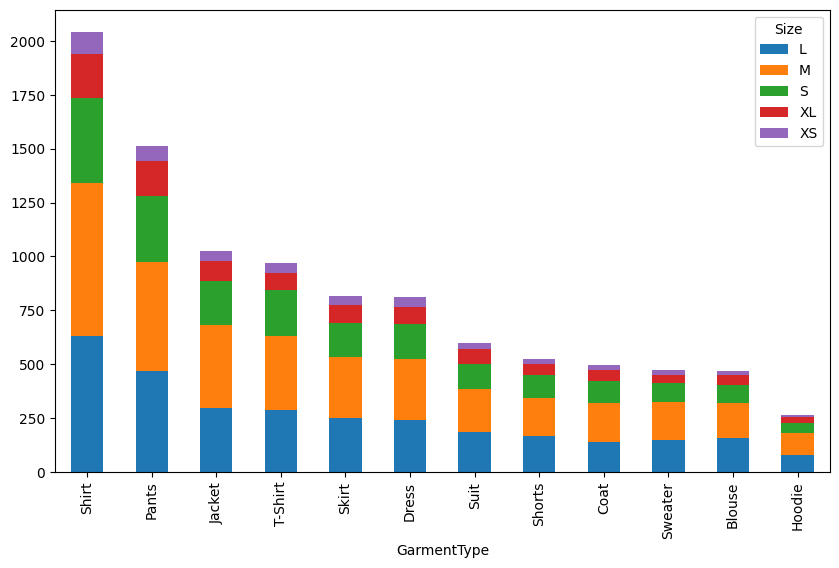

In [45]:
crosstab_sorted = pd.crosstab(product_attributes['GarmentType'], product_attributes['Size'])
crosstab_sorted['Total'] = crosstab_sorted.sum(axis=1)
crosstab_sorted = crosstab_sorted.sort_values(by='Total', ascending=False)
crosstab_sorted.drop(columns='Total', inplace=True)
crosstab_sorted
crosstab_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='GarmentType'>

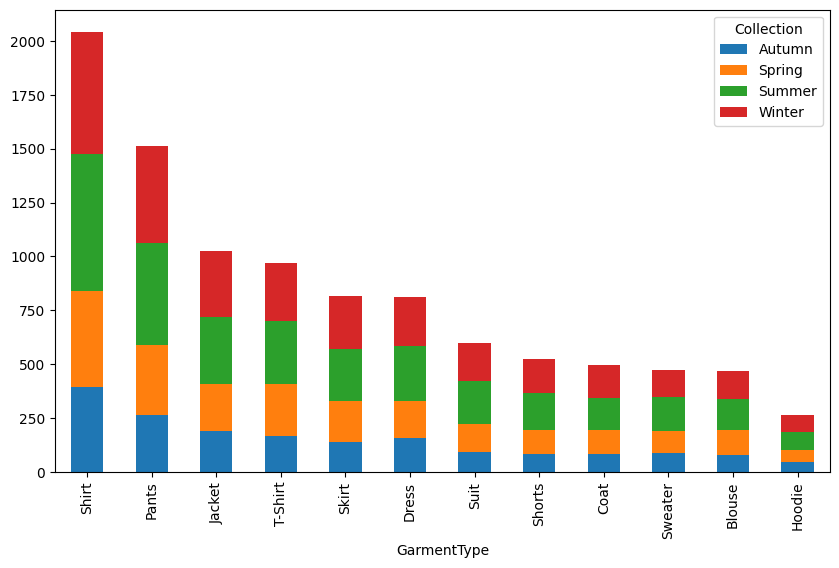

In [43]:
crosstab_sorted = pd.crosstab(product_attributes['GarmentType'], product_attributes['Collection'])
crosstab_sorted['Total'] = crosstab_sorted.sum(axis=1)
crosstab_sorted = crosstab_sorted.sort_values(by='Total', ascending=False)
crosstab_sorted.drop(columns='Total', inplace=True)
crosstab_sorted
crosstab_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))